<a href="https://colab.research.google.com/github/souviksamantabitu/Deeplearning6th_july/blob/main/Regression_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression with Keras

In [25]:
from warnings import filterwarnings
filterwarnings('ignore')

In [26]:
import pandas as pd
url="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df=pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


step2:perform basic data quality checks


In [27]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [28]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [29]:
df.duplicated().sum()

41

In [30]:
df=df.drop_duplicates(keep='first')
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


seperate x and y(pe)

In [31]:
x=df.drop(columns=['PE'])
y=df[['PE']]

step4:preprocess x using pipeline

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [33]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scale', StandardScaler())]).set_output(transform='pandas')


In [34]:
x_pre=num_pipe.fit_transform(x)
x_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


Apply Train Test split


In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre, y, test_size=0.2, random_state=42)


step5:Build the neural network

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [37]:
#add input layer
model = Sequential()
# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add Hidden layer 2
model.add(Dense(8, activation='relu'))

# Add output layer
model.add(Dense(1, activation='linear'))


In [38]:

# Compile the model
model.compile(loss="mse", metrics=["mae"], optimizer="adam")


In [39]:
hist = model.fit(xtrain, ytrain,
                 validation_data=(xtest, ytest),
                 epochs=100)

Epoch 1/100
239/239 [==============================] - 2s 4ms/step - loss: 206229.0469 - mae: 453.7670 - val_loss: 205135.0625 - val_mae: 452.5468
Epoch 2/100
239/239 [==============================] - 1s 3ms/step - loss: 203806.0781 - mae: 451.0809 - val_loss: 202412.8906 - val_mae: 449.5027
Epoch 3/100
239/239 [==============================] - 1s 4ms/step - loss: 200581.6875 - mae: 447.4512 - val_loss: 198418.3125 - val_mae: 444.9906
Epoch 4/100
239/239 [==============================] - 1s 3ms/step - loss: 195770.6406 - mae: 441.9918 - val_loss: 192714.7188 - val_mae: 438.4887
Epoch 5/100
239/239 [==============================] - 1s 3ms/step - loss: 189431.9688 - mae: 434.7032 - val_loss: 185640.2500 - val_mae: 430.2862
Epoch 6/100
239/239 [==============================] - 1s 3ms/step - loss: 181871.5625 - mae: 425.8336 - val_loss: 177489.0938 - val_mae: 420.6127
Epoch 7/100
239/239 [==============================] - 1s 3ms/step - loss: 173350.7656 - mae: 415.5789 - val_loss: 168

In [40]:
hist.history["loss"]

[206229.046875,
 203806.078125,
 200581.6875,
 195770.640625,
 189431.96875,
 181871.5625,
 173350.765625,
 164102.6875,
 154337.046875,
 144231.59375,
 133968.09375,
 123684.1640625,
 113527.1484375,
 103602.0703125,
 94021.40625,
 84886.3515625,
 76274.703125,
 68260.6796875,
 60896.65625,
 54229.4140625,
 48266.63671875,
 43011.0625,
 38448.01171875,
 34550.1484375,
 31256.74609375,
 28513.65625,
 26231.673828125,
 24319.921875,
 22700.60546875,
 21299.92578125,
 20055.716796875,
 18907.46875,
 17812.224609375,
 16750.470703125,
 15704.4443359375,
 14662.4853515625,
 13621.8896484375,
 12584.3974609375,
 11551.234375,
 10533.251953125,
 9534.298828125,
 8560.5478515625,
 7616.35205078125,
 6714.15625,
 5857.7744140625,
 5053.03369140625,
 4304.84765625,
 3617.9638671875,
 2994.294189453125,
 2440.699951171875,
 1959.27783203125,
 1548.1243896484375,
 1206.78515625,
 930.2021484375,
 711.2102661132812,
 542.1751708984375,
 412.9847412109375,
 314.17608642578125,
 240.52671813964844,


In [41]:
hist.history['val_loss']

[205135.0625,
 202412.890625,
 198418.3125,
 192714.71875,
 185640.25,
 177489.09375,
 168493.21875,
 158872.6875,
 148828.578125,
 138537.171875,
 128163.5078125,
 117829.46875,
 107707.6015625,
 97875.0546875,
 88454.0390625,
 79526.484375,
 71167.1953125,
 63446.32421875,
 56412.9375,
 50099.53125,
 44506.6015625,
 39622.53515625,
 35427.48828125,
 31884.82421875,
 28927.37890625,
 26481.880859375,
 24459.529296875,
 22765.517578125,
 21327.798828125,
 20073.6953125,
 18944.900390625,
 17875.72265625,
 16850.044921875,
 15843.4482421875,
 14842.9208984375,
 13844.8505859375,
 12837.36328125,
 11832.2373046875,
 10837.896484375,
 9857.4091796875,
 8897.2275390625,
 7960.26806640625,
 7059.37646484375,
 6198.98779296875,
 5380.9296875,
 4609.57470703125,
 3891.48876953125,
 3240.092041015625,
 2656.13720703125,
 2145.2626953125,
 1703.31298828125,
 1332.4644775390625,
 1028.707763671875,
 787.0357055664062,
 598.5474243164062,
 456.32965087890625,
 348.3138427734375,
 267.003234863281

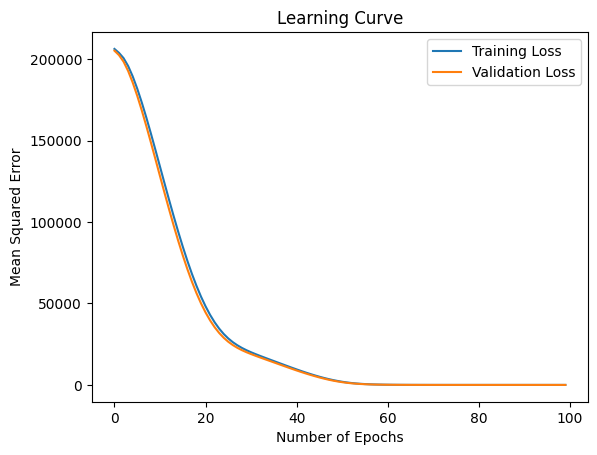

In [42]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()


In [43]:
model.evaluate(xtrain, ytrain)

239/239 [==============================] - 1s 2ms/step - loss: 20.6226 - mae: 3.6085


[20.622610092163086, 3.6085236072540283]

In [44]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 2ms/step - loss: 20.8986 - mae: 3.6579


[20.898550033569336, 3.6578967571258545]

predict the results for train and test

In [45]:

ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 2ms/step


In [46]:

ypred_train[0:5]


array([[451.419  ],
       [477.75375],
       [468.02786],
       [432.436  ],
       [466.19788]], dtype=float32)

In [47]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [48]:
#R2 score in train
from sklearn.metrics import r2_score
r2_score(ytrain,ypred_train)

0.9282504755166551

In [49]:

# R2 score in test
r2_score(ytest, ypred_test)

0.9307512649020583


Because I have r2 score > 0.8 for both train and test i can use above model for out of sample prediction

In [50]:

url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [51]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [52]:

xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [53]:

preds = model.predict(xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 3ms/step


array([[445.4939 ],
       [439.79355],
       [430.55038],
       [440.3127 ],
       [473.80948]], dtype=float32)

In [54]:


xnew["PowerOutput_pred"] = preds

In [55]:
xnew

,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,445.493896
1,28.88,54.89,1007.16,46.60,439.793549
2,27.89,73.21,1001.32,85.88,430.550385
3,25.69,62.26,1011.38,74.08,440.312714
4,12.16,40.81,1025.79,70.97,473.809479
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,437.567932
96,11.78,39.96,1011.37,82.95,471.506439
97,5.62,41.38,1020.91,86.21,483.594788
98,24.96,74.99,1008.25,80.52,437.348877


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

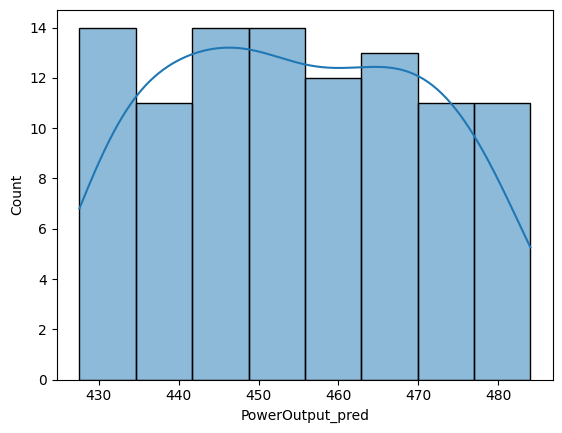

In [56]:

import seaborn as sns
sns.histplot(data=xnew, x="PowerOutput_pred", kde=True)



In [57]:
xnew.to_csv("Results.csv", index=False)